## Digit Recognition (MNIST Dataset) using Random Forrest

In [6]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [8]:
#Suppress Future warning form SciKit Learn
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [9]:
#load the digits dataset
digits = load_digits()

In [10]:
digits.data.shape

(1797, 64)

In [11]:
digits.target.shape

(1797,)

## Displaying the Images and Labels

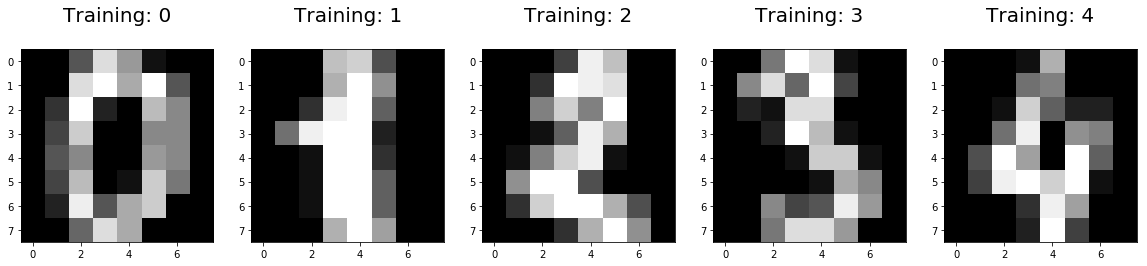

In [12]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
    

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [2]:
#import the Logistictic Regression Model
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Create an instance of the Logistic regression model
randForest = RandomForestClassifier()

In [14]:
#Train the data
#Note Sklearn will thrown a future warning message for version 0.22
#make sure to add the lines above suppress the warnings
randForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
#predict one image
predict_1 = randForest.predict(X_test[0].reshape(1,-1))
predict_1

array([2])

In [16]:
#predict multiple observations
predict_mul = randForest.predict(X_test[0:10])
predict_mul

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [17]:
#prdict the entire test data
predict = randForest.predict(X_test)
predict

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       8, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 8, 9, 7, 2, 3, 6, 0, 8, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 7, 8, 3, 1, 5, 2, 5, 6, 4, 1, 7, 0, 6, 1, 5, 3, 3,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 3, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 3, 6, 3, 0, 3, 3, 3, 0, 4, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 8, 1, 6, 8, 9,
       2, 4, 8, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 1, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 1, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

## Measure the performance of the model

In [18]:
#using the score method to get the accuracy of the model
score = randForest.score(X_test, y_test)
score

0.94

## Uisng the Confusion Matrix

In [19]:
# to use the confusion matrix, make sure you import the metrics library
cm = metrics.confusion_matrix(y_test, predict)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  1,  0,  1,  1,  0,  1,  0],
       [ 0,  1, 39,  1,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 46,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  2,  0,  2,  0,  0,  1,  1, 41,  1],
       [ 0,  0,  0,  3,  0,  0,  0,  1,  1, 42]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score:0.94')

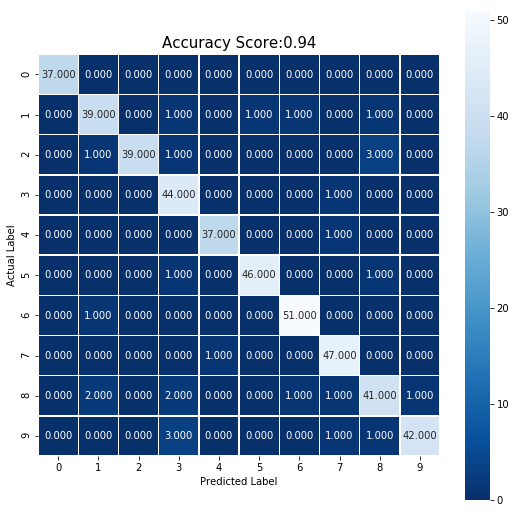

In [20]:
#plot the comfusion matrix using heatmap form seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title ='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title, size=15)

## Using the MNIST Dataset

In [21]:
import os
import struct
import gzip

In [22]:
def load_MNIST(path, kind='train'):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    
    with gzip.open(labels_path, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)
        
    with gzip.open(images_path, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        images = np.frombuffer(buffer, dtype=np.uint8).reshape(len(labels), 784).astype(np.float64)
        
    return images, labels

In [23]:
X_train, y_train = load_MNIST('', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [24]:
X_test, y_test = load_MNIST('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


## Image visualization of the digits

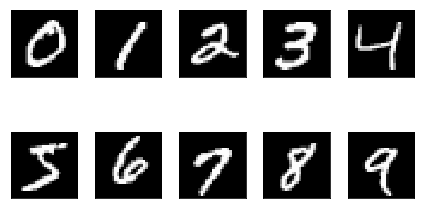

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax=ax.flatten()

for i in range(10):
    img = X_train[y_train == i][0].reshape(28,28) #get all datapoints where the digit image is equal to i
    ax[i].imshow(img, cmap='gist_gray', interpolation='nearest')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [26]:
X_train.shape

(60000, 784)

In [27]:
y_train.shape

(60000,)

## Visualize 25 Sample Image of digit 5

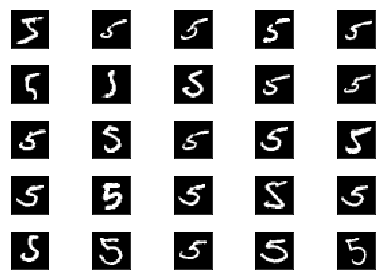

In [28]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 5][i].reshape(28, 28)
    ax[i].imshow(img, cmap='gist_gray', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()

## Using Random Forest Classifier Model for Classification

#### Step1: Create an instance of the Logistic Regression Model

In [41]:
#set the solver to 'lbfgs'

MNIST_randForest = RandomForestClassifier(n_estimators=100)

#### Step2: Train the data


In [42]:
MNIST_randForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Step 3: Make a prediction using the test data

In [31]:
#take one sample label for checking
y_test[0]

7

In [32]:
#make sure to flatten the data by rehaping
MNIST_randForest.predict(X_test[0].reshape(1,-1))

array([7], dtype=uint8)

In [33]:
#making multiple predictions
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [34]:
MNIST_randForest.predict(X_test[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

### Measuring the Accuracy of the Model

In [43]:
score = MNIST_randForest.score(X_test, y_test)
score

0.9691

### Getting the Confusion Matrix

In [44]:
#predict the entire test data set
prediction = MNIST_randForest.predict(X_test)

In [45]:
#compute the confusion matrix
cm = metrics.confusion_matrix(y_test, prediction)
cm

array([[ 972,    0,    0,    0,    0,    2,    2,    1,    3,    0],
       [   0, 1125,    2,    3,    0,    1,    2,    0,    1,    1],
       [   6,    0, 1000,    5,    4,    0,    3,    8,    5,    1],
       [   0,    0,    9,  970,    0,    8,    0,   10,   10,    3],
       [   1,    0,    3,    0,  955,    0,    4,    0,    3,   16],
       [   3,    0,    2,   13,    3,  858,    5,    1,    4,    3],
       [   8,    3,    0,    0,    3,    4,  935,    0,    5,    0],
       [   1,    3,   19,    1,    0,    0,    0,  993,    1,   10],
       [   5,    1,    6,    7,    3,    7,    5,    5,  926,    9],
       [   7,    6,    2,   11,   12,    5,    0,    4,    5,  957]],
      dtype=int64)

Text(0.5, 1.0, 'Accuracy Score:0.9691')

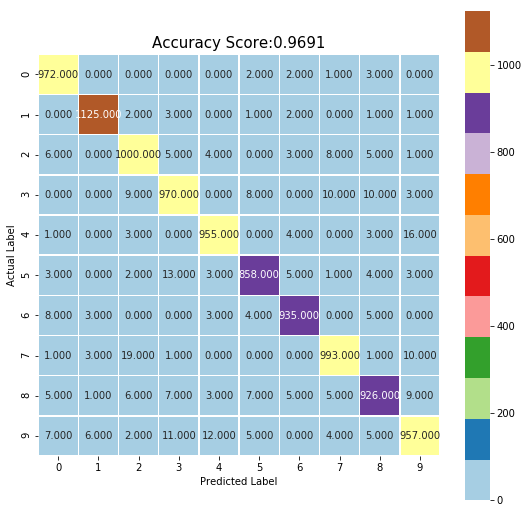

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap='Paired')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title ='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title, size=15)

### Displaying Misclassified Digit

In [47]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, prediction):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

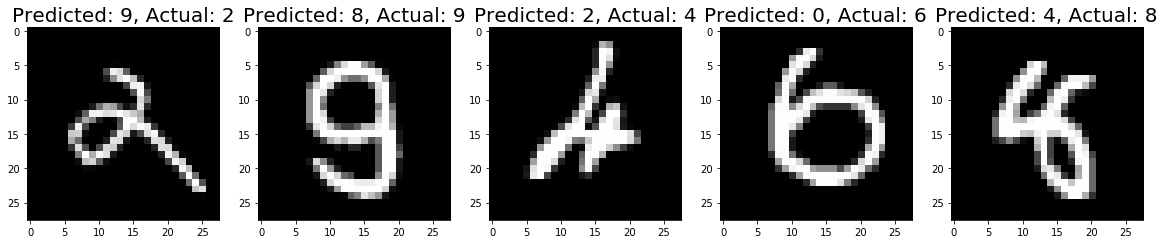

In [48]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(prediction[badIndex], y_test[badIndex]), fontsize = 20)